In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import sqlalchemy as sqla
df_nArticlesPerUser = pd.read_pickle("../dummy.pkl")

In [2]:
df_nArticlesPerUser

,ID_User,Beitrag
0,28526,Das ist eine Schicht von mehreren 1000 möglich...
1,28526,wird das dann wie bei den arbeitszeugnissen we...
2,28526,naja ein bisserl mehr als 10-20 prozent der be...
3,28526,Wobei ich das Beispiel der Mindestsicherung oh...
4,28526,"Also wenn es einen Narrativ in Hollywood gibt,..."
...,...,...
795,18006,"Europa zu einem ""melting pot"" zu machen mit Ku..."
796,18006,Jeder männliche Afghane ist verpflichtet einen...
797,18006,Man muss die Flüchtlinge nur bis an die türkis...
798,18006,"Nein, die islamistische Terrorgruppe ""Islamisc..."


In [3]:
UserIDListe = df_nArticlesPerUser.drop_duplicates(subset = ["ID_User"])['ID_User'].tolist()
print(len(UserIDListe))
print(UserIDListe)

20
[28526, 6498, 6247, 28816, 18083, 26866, 22876, 27393, 8765, 11656, 30661, 29377, 15886, 5854, 30344, 18446, 8446, 26532, 12887, 18006]


In [4]:
from sklearn.model_selection import train_test_split

features = df_nArticlesPerUser.Beitrag
labels = df_nArticlesPerUser.ID_User

X_train, X_test, y_train, y_test =train_test_split(features, labels, test_size=0.2)

In [5]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df.columns = ["text", "labels"]
train_df = train_df.reset_index(drop=True)
train_df

,text,labels
0,“Meiner Lunge (ich bin Triathlet) ist es völli...,29377
1,Was faselst? Wer ist denn der von uns beide...,29377
2,Das ist schon bei einer Gemeinderatswahl recht...,18083
3,Sie sprechen es ja schon etwas an: bis auf den...,18006
4,"Wünsch mir ein Xbie Porto-Kiew, Chelsea sollte...",26532
...,...,...
635,Wobei ich mir nicht sicher bin ob das durchdac...,28526
636,Österreichische Werte?Humanismus? Menschliche ...,8765
637,Und das schöne an so einer Rochade:In der Minu...,30661
638,“reumütig“?? Na aber sicher nicht. “widerw...,29377


In [6]:
eval_df = pd.concat([X_test, y_test], axis=1)
eval_df.columns = ["text", "labels"]
eval_df = eval_df.reset_index(drop=True)
eval_df 

,text,labels
0,Der nationale Blick verengt auch in Griechenla...,26866
1,""" Die Wikileaks-Enthüllungen könnten ernsthaft...",30661
2,"in der formel 1 schaut keiner mehr zu, weil di...",8446
3,Das ist nicht flächendeckend zu beantworten. ...,6247
4,wie kann man sich wie ein Assad in so etwas ha...,11656
...,...,...
155,"Man muss zudem auch berücksichtigen, dass die ...",18446
156,Hinkelstein vs hinkenden Vergleich wenn wir...,11656
157,am schlimmsten finde ich diese programmvorscha...,8446
158,Der IS wird nicht überleben. Problematisch ist...,5854


In [7]:
import torch
cuda_available = torch.cuda.is_available()
print("Cuda available : ",cuda_available)

Cuda available :  True


In [8]:
import logging

import pandas as pd
import sklearn

from simpletransformers.classification import (
    ClassificationArgs,
    ClassificationModel,
)
from sklearn.metrics import accuracy_score

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

model_args = ClassificationArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 3
model_args.no_save = True
model_args.evaluate_during_training = True
model_args.labels_list = UserIDListe

model = ClassificationModel(
    "bert", 
    "bert-base-german-cased", 
    args=model_args, 
    num_labels=len(UserIDListe), 
    use_cuda=cuda_available,
)

Some weights of the model checkpoint at bert-base-german-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoi

In [9]:
model.train_model(train_df, eval_df=eval_df, acc=accuracy_score)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/640 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_20_2
E:\Users\Martina\anaconda3\envs\pytorch_trial_0\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/80 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/160 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_20_2


Running Epoch 1 of 3:   0%|          | 0/80 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/160 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_20_2


Running Epoch 2 of 3:   0%|          | 0/80 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/160 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_20_2
INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(240,
 defaultdict(list,
             {'global_step': [80, 160, 240],
              'train_loss': [2.2796630859375,
               1.479644775390625,
               0.7691802978515625],
              'mcc': [0.4029955153913634,
               0.5387178677886293,
               0.6021366970895541],
              'acc': [0.425, 0.55625, 0.61875],
              'eval_loss': [2.26259765625,
               1.7025711059570312,
               1.5434440612792968]}))

In [10]:
#result, model_outputs, wrong_predictions = model.eval_model(eval_df)
predictions, raw_outputs = model.predict(list(X_test))

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [11]:
score_bert = accuracy_score(predictions, y_test)

In [12]:
score_bert

0.61875

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(y_test, predictions)

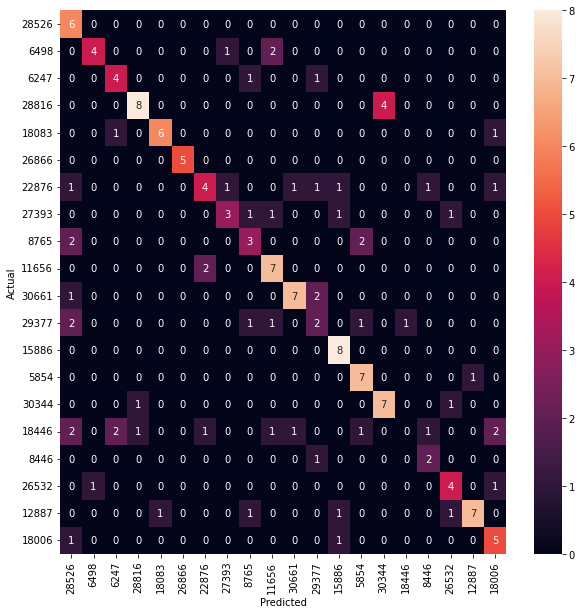

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(matrix, annot=True, fmt='d', xticklabels=UserIDListe, yticklabels=UserIDListe)
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()